In [2]:
import numpy as np
import h5py
import os
# import pandas as pd
import matplotlib.pyplot as plt

import Pylians3
import MAS_library as MASL
from matplotlib.colors import LogNorm, SymLogNorm
import plotting_library as PL
from pylab import *

import Pk_library as PKL

# h5py.run_tests()

import scienceplots

plt.style.use(['science', 'no-latex'])
plt.rcParams.update({
    # Figure
    'figure.figsize': (6.8, 4.2),
    'figure.dpi': 150,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'savefig.pad_inches': 0.05,

    # Lines and markers
    'lines.linewidth': 1.5,
    'lines.markersize': 5,

    # Font
    'font.size': 9,
    'axes.labelsize': 9,
    'axes.titlesize': 10,
    'legend.fontsize': 8,
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,

    # Axes
    'axes.linewidth': 1.0,
    'axes.grid': False,
    'grid.alpha': 0.3,

    # Ticks
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'xtick.major.size': 4,
    'ytick.major.size': 4,

    # Legend
    'legend.frameon': False,

    # Text rendering (LaTeX)
    'text.usetex': False,               # Optional: needs LaTeX installed
    'text.latex.preamble': r'\usepackage{amsmath,amssymb}',  # Optional
})

In [10]:
# nparts = 0
# for i in range(8):
#     with h5py.File(f"snapdir_000/snap_000.{i}.hdf5", "r") as f:
#         nparts += f['PartType1']['Coordinates'].shape[0]

# print("Total DM particles:", nparts)

# # Allocate big arrays up front
# pos = np.empty((nparts, 3), dtype=np.float32)
# vel = np.empty((nparts, 3), dtype=np.float32)

# # Second pass: fill them
# offset = 0
# for i in range(8):
#     with h5py.File(f"snapdir_000/snap_000.{i}.hdf5", "r") as f:
#         coords = f['PartType1']['Coordinates'][:]
#         vels = f['PartType1']['Velocities'][:]

#         n = coords.shape[0]
#         pos[offset:offset+n] = coords
#         vel[offset:offset+n] = vels
#         offset += n

# print("Final shapes:", pos.shape, vel.shape)

# # Optional: save to disk
# np.save("PartType1_Coordinates.npy", pos)
# np.save("PartType1_Velocities.npy", vel)

In [11]:
# def read_snap(N,snap,path):
#   """
#   Function given by Cristian's collaborator.
#   """
#   Lbox = 500. #L=1500 Mpc/h or 500 Mpc/h
#   pos_c = [None]*N

#   path = path+'/snapdir_%03d/'%snap

#   print("Data read from %s"%path)
  
#   infile = h5py.File(path+"snap_%03d.0.hdf5"%snap,"r")
#   print ('Redshift z=%1.2f'%infile["Header"].attrs["Redshift"])
  
#   for i in range(N):
#     f = h5py.File(path+"snap_%03d.%i.hdf5"%(snap,i),"r")
#     pos_c[i] = f["PartType1/IntegerCoordinates"][...]
#     f.close()

#   pos_c = np.concatenate(pos_c)
#   return pos_c/pow(2.0,32)*Lbox

# path_GR = os.getcwd()
# path1_a = path_GR
# posa_GR = read_snap(8,0,path1_a)

# np.save('Coordinates.npy', posa_GR)

In [12]:
# def read_snap(N,snap,path):
#   """
#   Function given by Cristian's collaborator.
#   """
#   Lbox = 500. #L=1500 Mpc/h or 500 Mpc/h
#   vel_c = [None]*N

#   path = path+'/snapdir_%03d/'%snap

#   print("Data read from %s"%path)
  
#   infile = h5py.File(path+"snap_%03d.0.hdf5"%snap,"r")
#   print ('Redshift z=%1.2f'%infile["Header"].attrs["Redshift"])
  
#   for i in range(N):
#     f = h5py.File(path+"snap_%03d.%i.hdf5"%(snap,i),"r")
#     vel_c[i] = f["PartType1/Velocities"][...]
#     f.close()

#   vel_c = np.concatenate(vel_c)
#   return vel_c

# path_GR = os.getcwd()
# path1_a = path_GR
# posa_GR = read_snap(8,0,path1_a)

# np.save('Velocities.npy', posa_GR)

In [ ]:
# # density field parameters
# Ngrid    = 1024    #the 3D field will have grid x grid x grid voxels
# BoxSize = 500.0 #Mpc/h ; size of box
# MAS     = 'CIC'  #mass-assigment scheme
# verbose = True   #print information on progress

# # particle positions in 3D
# pos = np.load('Coordinates.npy').astype(np.float32)

# # define 3D density field
# delta_3d = np.zeros((Ngrid,Ngrid,Ngrid), dtype=np.float32)

# # construct 3D density field
# MASL.MA(pos, delta_3d, BoxSize, MAS, verbose=verbose)

# # at this point, delta contains the effective number of particles in each voxel
# # now compute overdensity and density constrast
# delta_3d /= np.mean(delta_3d, dtype=np.float64)
# delta_3d -= 1.0

In [ ]:
# BoxSize = 500.0
# Ngrid   = 1024
# MAS     = 'CIC'

# pos = np.load('Coordinates.npy').astype(np.float32)
# vel = np.load('Velocities.npy').astype(np.float32)

# delta_3d = np.load('delta_3d.npy')      
# print('data loaded')

# qx = np.zeros_like(delta_3d)
# qy = np.zeros_like(delta_3d)
# qz = np.zeros_like(delta_3d)

# print('Computing vel fields...')

# MASL.MA(pos, qx, BoxSize, MAS, vel[:,0].astype(np.float32), True)
# np.save('Momentum_field_x.npy', qx)
# print('x saved')

# MASL.MA(pos, qy, BoxSize, MAS, vel[:,1].astype(np.float32), True)
# np.save('Momentum_field_y.npy', qy)
# print('y saved')

# MASL.MA(pos, qz, BoxSize, MAS, vel[:,2].astype(np.float32), True)
# np.save('Momentum_field_z.npy', qz)
# print('z saved')

In [4]:
# np.save('delta_3d.npy', delta_3d)
delta_3d = np.load('delta_3d.npy')
qx_field = np.load('Momentum_field_x.npy')
qy_field = np.load('Momentum_field_y.npy')
qz_field = np.load('Momentum_field_z.npy')

In [3]:
min_overdensity = max(np.min(delta_3d),1e-10)
max_overdensity = np.max(delta_3d)

min_qx = np.min(qx_field)
max_qx = np.max(qx_field)

min_qy = np.min(qy_field)
max_qy = np.max(qy_field)

min_qz = np.min(qz_field)
max_qz = np.max(qz_field)


python(94063) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(94064) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


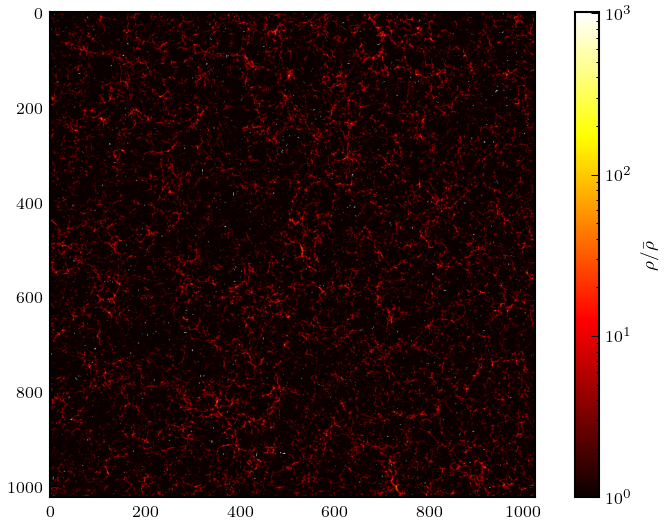

In [ ]:
fig, ax = plt.subplots()

cax = plt.imshow(delta_3d[:, :, 1024//2]+1,
                 cmap='hot',
                 norm = LogNorm(vmin=min_overdensity+1,vmax=max_overdensity+1))

cbar = fig.colorbar(cax)
cbar.set_label(r"$\rho/\bar{\rho}$")

python(94021) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(94022) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


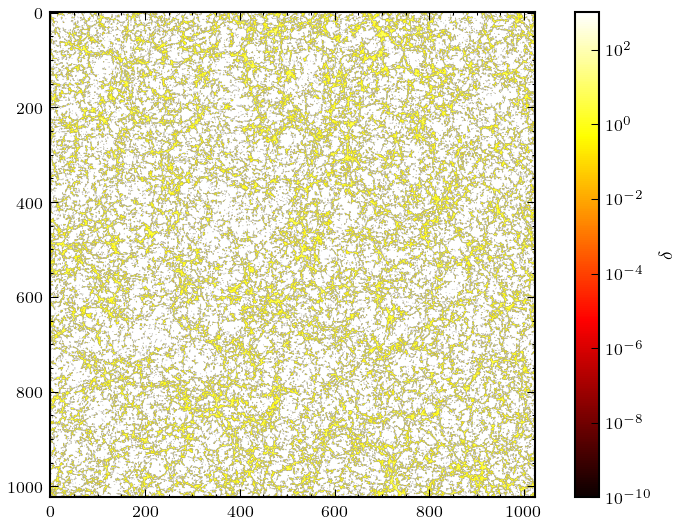

In [ ]:
fig, ax = plt.subplots()

cax = plt.imshow(delta_3d[:, :, 1024//2],
                 cmap='hot',
                 norm = LogNorm(vmin=min_overdensity,vmax=max_overdensity))

cbar = fig.colorbar(cax)
cbar.set_label(r"$\delta$")

python(177) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(178) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(179) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(180) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(181) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(182) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(183) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(184) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(185) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(186) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(187) MallocStackLogging: can't tu

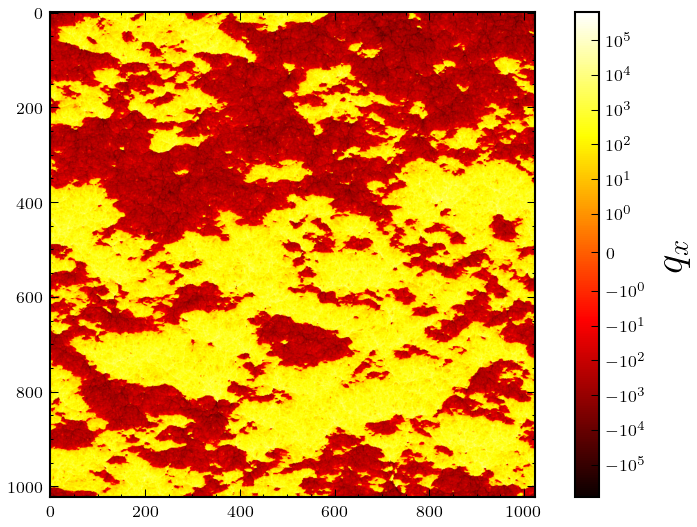

In [9]:
fig, ax = plt.subplots()

cax = plt.imshow(qx_field[:, :, 1024//2],
                 cmap='hot',
                 norm = SymLogNorm(linthresh=1,vmin=min_qx,vmax=max_qx))
cbar = fig.colorbar(cax)
cbar.set_label(r"$q_x$",fontsize=20)

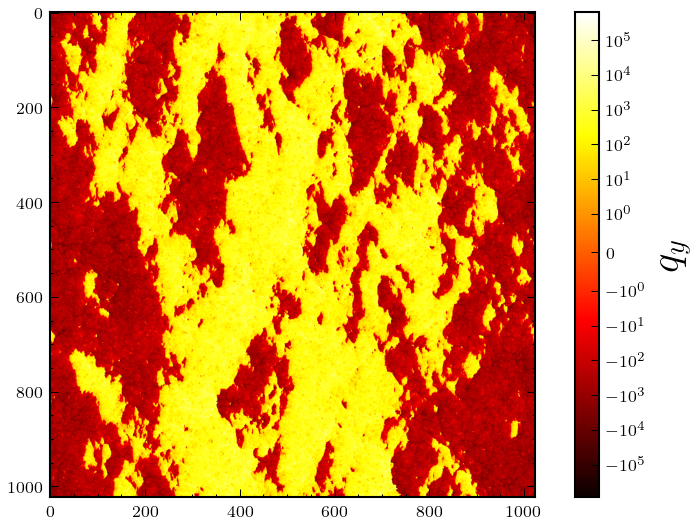

In [10]:
fig, ax = plt.subplots()

cax = plt.imshow(qy_field[:, :, 1024//2],
                 cmap='hot',
                 norm = SymLogNorm(linthresh=1,vmin=min_qx,vmax=max_qx))

cbar = fig.colorbar(cax)
cbar.set_label(r"$q_y$",fontsize=20)

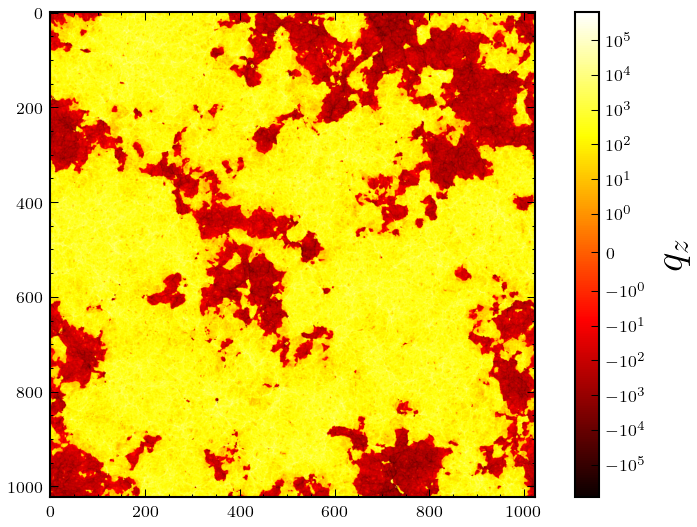

In [11]:
fig, ax = plt.subplots()

cax = plt.imshow(qz_field[:, :, 1024//2],
                 cmap='hot',
                 norm = SymLogNorm(linthresh=1,vmin=min_qx,vmax=max_qx))

cbar = fig.colorbar(cax)
cbar.set_label(r"$q_z$",fontsize=20)

In [5]:
import Pk_library as PKL

# compute power spectrum
Pk = PKL.Pk(delta_3d, 500, 0, 'CIC', 1, True)

# Pk is a python class containing the 1D, 2D and 3D power spectra, that can be retrieved as

# 1D P(k)
k1D      = Pk.k1D
Pk1D     = Pk.Pk1D
Nmodes1D = Pk.Nmodes1D

# 2D P(k)
kpar     = Pk.kpar
kper     = Pk.kper
Pk2D     = Pk.Pk2D
Nmodes2D = Pk.Nmodes2D

# 3D P(k)
k       = Pk.k3D
Pk0     = Pk.Pk[:,0] #monopole
Pk2     = Pk.Pk[:,1] #quadrupole
Pk4     = Pk.Pk[:,2] #hexadecapole
Pkphase = Pk.Pkphase #power spectrum of the phases
Nmodes  = Pk.Nmodes3D


Computing power spectrum of the field...
Time to complete loop = 37.58
Time taken = 85.03 seconds


Text(0.5, 0, '$k$')

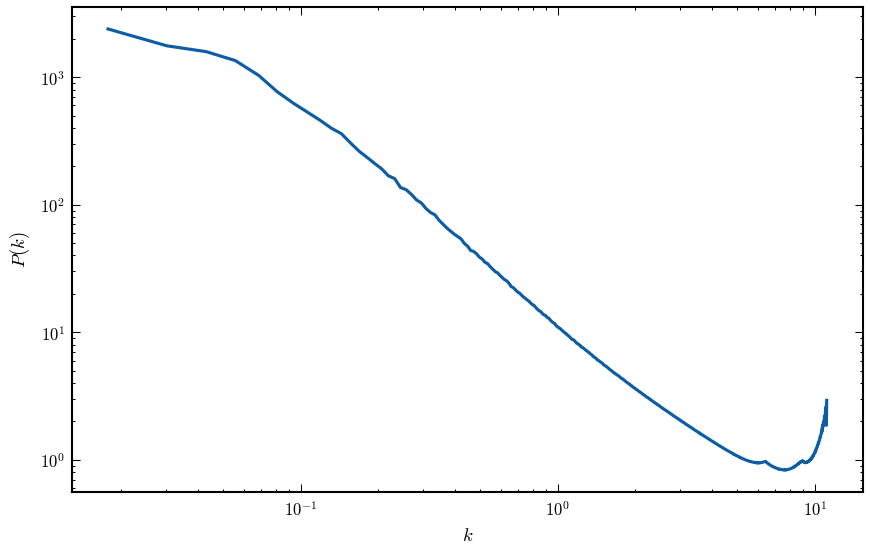

In [6]:
fig, ax = plt.subplots()

# ax.loglog(k1D, Pk1D)
ax.loglog(k, Pk0)
ax.set_ylabel(r'$P(k)$')
ax.set_xlabel(r'$k$')

In [ ]:
# np.save('outputs/k_ps.npy', k)
# np.save('outputs/Pk_ps.npy', Pk0)

In [10]:
# def Pk_curl(qx, qy, qz, BoxSize, MAS='CIC', threads=1):
#     """
#     Computes auto-power spectra of a momentum field curl[q].
#     Vectorize it or cythonyze it, or both.
#     """

#     start = time.time()

#     # dimensions and setup
#     dims   = len(qx)
#     middle = dims // 2
#     kF, kN, kmax_par, kmax_per, kmax = PKL.frequencies(BoxSize, dims)
#     MAS_index = PKL.MAS_function(MAS)
#     MAS_corr  = np.zeros(3, dtype=np.float64)

#     # compute (1+delta)*V fields
#     # qx *= (1.0 + delta1); qy *= (1.0 + delta1); qz *= (1.0 + delta1)

#     # FFTs (assumes FFT3Dr_f returns np.complex64 arrays)
#     # delta1_k = PKL.FFT3Dr_f(delta1, threads)
#     qx_k    = PKL.FFT3Dr_f(qx, threads)
#     qy_k    = PKL.FFT3Dr_f(qy, threads)
#     qz_k    = PKL.FFT3Dr_f(qz, threads)

#     # arrays for k, Pk, Nmodes
#     k      = np.zeros(kmax+1, dtype=np.float64)
#     Pk     = np.zeros(kmax+1, dtype=np.float64)
#     Nmodes = np.zeros(kmax+1, dtype=np.float64)

#     # main loop over modes
#     start2 = time.time()
#     prefact = np.pi / dims

#     for kxx in range(dims):
#         kx = (kxx - dims if (kxx > middle) else kxx)
#         MAS_corr[0] = PKL.MAS_correction(prefact * kx, MAS_index)

#         for kyy in range(dims):
#             ky = (kyy - dims if (kyy > middle) else kyy)
#             MAS_corr[1] = PKL.MAS_correction(prefact * ky, MAS_index)

#             for kzz in range(middle+1):  # only half the cube (kz >= 0)
#                 kz = (kzz - dims if (kzz > middle) else kzz)
#                 MAS_corr[2] = PKL.MAS_correction(prefact * kz, MAS_index)

#                 # special planes: avoid double counting
#                 if kz == 0 or (kz == middle and dims % 2 == 0):
#                     if kx < 0: 
#                         continue
#                     elif kx == 0 or (kx == middle and dims % 2 == 0):
#                         if ky < 0: 
#                             continue

#                 # |k|
#                 kmod = np.sqrt(kx*kx + ky*ky + kz*kz)
#                 k_index = int(kmod)

#                 # correct amplitudes for MAS
#                 MAS_factor = MAS_corr[0]*MAS_corr[1]*MAS_corr[2]

#                 # delta1_k[kxx,kyy,kzz] *= MAS_factor
#                 qx_k[kxx,kyy,kzz]    *= MAS_factor
#                 qy_k[kxx,kyy,kzz]    *= MAS_factor
#                 qz_k[kxx,kyy,kzz]    *= MAS_factor

#                 # compute curl parts
#                 omegax = 1j * (ky * qz_k[kxx,kyy,kzz] - kz * qy_k[kxx,kyy,kzz])
#                 omegay = 1j * (kz * qx_k[kxx,kyy,kzz] - kx * qz_k[kxx,kyy,kzz])
#                 omegaz = 1j * (kx * qy_k[kxx,kyy,kzz] - ky * qx_k[kxx,kyy,kzz])

#                 # omegax_real = (ky * Vz1_k.imag - kz * Vy1_k.imag)
#                 # omegay_real = (kz * Vx1_k.imag - kx * Vz1_k.imag)
#                 # omegaz_real = (kx * Vy1_k.imag - ky * Vx1_k.imag)

#                 # omegax_imag = (ky * Vz1_k.real - kz * Vy1_k.real)
#                 # omegay_imag = (kz * Vx1_k.real - kx * Vz1_k.real)
#                 # omegaz_imag = (kx * Vy1_k.real - ky * Vx1_k.real)

#                 # accumulate power
#                 k[k_index]      += kmod
#                 Pk[k_index] += (np.abs(omegax)**2 +
#                                 np.abs(omegay)**2 +
#                                 np.abs(omegaz)**2)
#                 # Pk[k_index] += (omegax_real*omegax_real + omegax_imag*omegax_imag + \
#                 #                 omegay_real*omegay_real + omegay_imag*omegay_imag + \
#                 #                 omegaz_real*omegaz_real + omegaz_imag*omegaz_imag)
#                 Nmodes[k_index] += 1.0

#     print('Time compute modulus = %.2f' % (time.time()-start2))

#     # normalize and discard fundamental bin
#     PKL.check_number_modes(Nmodes, dims)

#     k   = k[1:];    Nmodes = Nmodes[1:]
#     k   = (k / Nmodes) * kF

#     norm_factor = (BoxSize / dims**2)**3 * kF**2
#     Pk = Pk[1:] * norm_factor / Nmodes

#     print('Time taken = %.2f seconds' % (time.time()-start))

#     return k, Pk, Nmodes

In [3]:
k, Pk_curl, Nmodes = PKL.Pk_curl(qx_field, qy_field, qz_field, 1024, MAS='CIC', threads=1)

Computing power spectra of the fields...
Time compute modulus = 41.38
Time taken = 167.72 seconds


In [ ]:
# np.save('k_curl.npy', k)
# np.save('Pk_curl.npy', Pk_curl)
# np.save('Nmodes_curl.npy', Nmodes)

In [3]:
k = np.load('outputs/k_curl.npy')
Pk_curl = np.load('outputs/Pk_curl.npy')
Nmodes = np.load('outputs/Nmodes_curl.npy')

Text(0, 0.5, '$\\Delta(k)$')

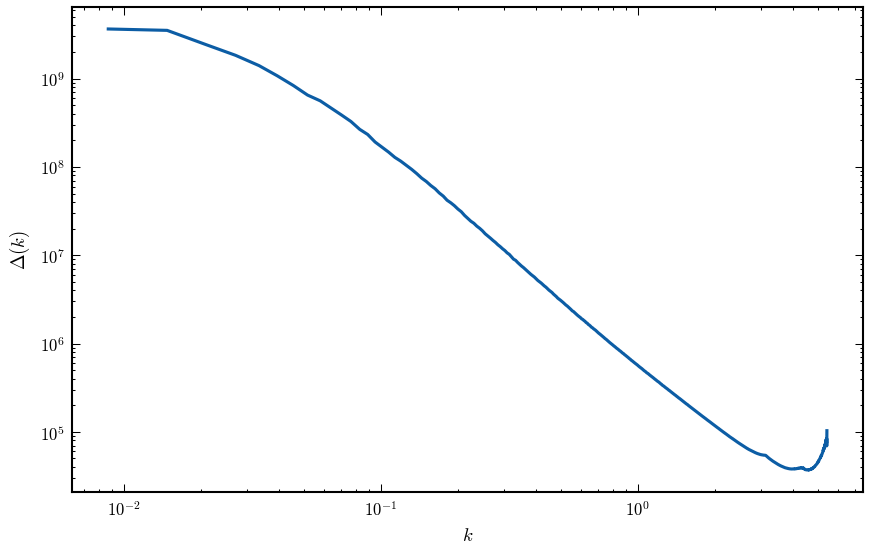

In [10]:
fig, ax = plt.subplots()

ax.loglog(k, Pk_curl/(k**3)/(2*np.pi**2))
ax.set_xlabel('$k$')
ax.set_ylabel('$\Delta(k)$')

Should take a look at units, and hope that this is suppressed

Text(0, 0.5, '$\\Delta(k)$')

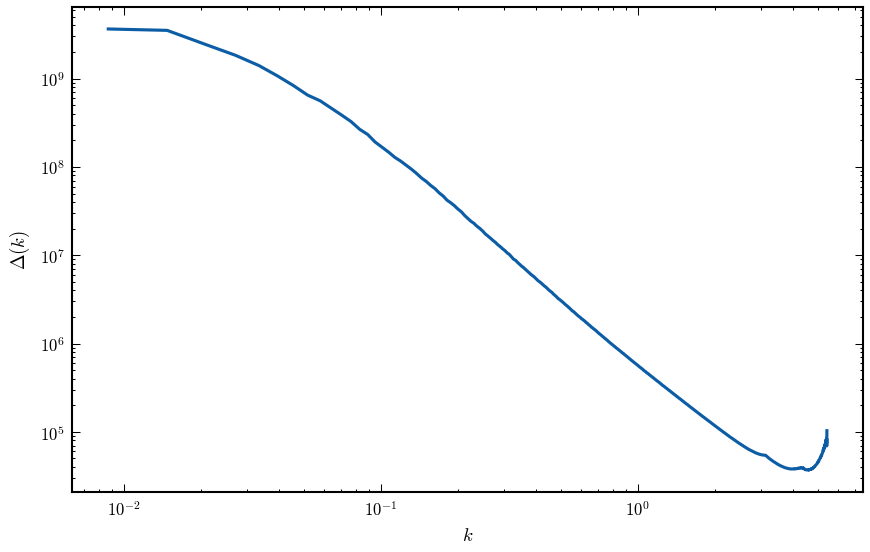

In [4]:
fig, ax = plt.subplots()

ax.loglog(k, Pk_curl/(k**3)/(2*np.pi**2))
ax.set_xlabel('$k$')
ax.set_ylabel('$\Delta(k)$')

In [ ]:
# def Pk_curl_vec(qx, qy, qz, BoxSize, MAS='CIC'):
#     """
#     Vectorized version of Pk_curl:
#     Computes auto-power spectrum of curl[(1+δ)V].
#     """

#     start = time.time()
#     dims  = qx.shape[0]
#     middle = dims // 2
#     kF = 2.0 * np.pi / BoxSize

#     # FFTs
#     Vx1_k = np.fft.rfftn(qx)   # shape (N, N, N/2+1)
#     Vy1_k = np.fft.rfftn(qy)
#     Vz1_k = np.fft.rfftn(qz)

#     # Build k-grid
#     kx = np.fft.fftfreq(dims) * dims   # integer wave numbers
#     ky = np.fft.fftfreq(dims) * dims
#     kz = np.fft.rfftfreq(dims) * dims  # only half along z
#     kxv, kyv, kzv = np.meshgrid(kx, ky, kz, indexing="ij")

#     # === Optional: MAS correction (vectorized) ===
#     # prefact = np.pi / dims
#     # MAS_corr = (PKL.MAS_correction(prefact*kxv, MAS_index) *
#     #             PKL.MAS_correction(prefact*kyv, MAS_index) *
#     #             PKL.MAS_correction(prefact*kzv, MAS_index))
#     # Vx1_k *= MAS_corr; Vy1_k *= MAS_corr; Vz1_k *= MAS_corr

#     # Curl components in Fourier space
#     omegax = 1j * (kyv * Vz1_k - kzv * Vy1_k)
#     omegay = 1j * (kzv * Vx1_k - kxv * Vz1_k)
#     omegaz = 1j * (kxv * Vy1_k - kyv * Vx1_k)

#     # Power per mode
#     Pk_field = (np.abs(omegax)**2 +
#                 np.abs(omegay)**2 +
#                 np.abs(omegaz)**2)

#     # Mode magnitudes
#     kmod = np.sqrt(kxv**2 + kyv**2 + kzv**2)

#     # Bin by integer k index
#     k_index = kmod.astype(int).ravel()
#     Pk_flat = Pk_field.ravel()

#     Nmodes = np.bincount(k_index, minlength=dims)
#     Pk     = np.bincount(k_index, weights=Pk_flat, minlength=dims)
#     ksum   = np.bincount(k_index, weights=kmod.ravel(), minlength=dims)

#     # Discard fundamental bin
#     Nmodes = Nmodes[1:]
#     Pk     = Pk[1:]
#     ksum   = ksum[1:]

#     k = (ksum / Nmodes) * kF

#     norm_factor = (BoxSize / dims**2)**3 * kF**2
#     Pk = Pk * norm_factor / Nmodes

#     print(f"Time taken = {time.time()-start:.2f} s")

#     return k, Pk, Nmodes

In [ ]:
# k, Pk_curl, Nmodes = Pk_curl_vec(qx_field, qy_field, qz_field, 1024, MAS='CIC')


: 